# Import the Libraries

In [46]:
import numpy as np
import pandas as pd
import h5py as h5
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [47]:
data=h5.File('C:/Users/ykkr1/Downloads/NN_Project/SVHN_single_grey1.h5','r')
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [48]:
# Load the training,testing and validation data
X_train=data['X_train']
X_test=data['X_test']
X_val=data['X_val']
y_train=data['y_train']
y_test=data['y_test']
y_val=data['y_val']

In [49]:
# Print the shape and data type of train,test and validation data
print("Training data X----shape :",X_train.shape,"and data type: ",X_train.dtype)
print("Testing data X-----shape :",X_test.shape,"and data type: ",X_test.dtype)
print("Validation data X--shape :",X_val.shape,"and data type: ",X_val.dtype)
print("Training data y----shape :",y_train.shape,"and data type: ",X_train.dtype)
print("Testing data y-----shape :",y_test.shape,"and data type: ",y_test.dtype)
print("Validation data y--shape :",y_val.shape,"and data type: ",y_val.dtype)

Training data X----shape : (42000, 32, 32) and data type:  float32
Testing data X-----shape : (18000, 32, 32) and data type:  float32
Validation data X--shape : (60000, 32, 32) and data type:  float32
Training data y----shape : (42000,) and data type:  float32
Testing data y-----shape : (18000,) and data type:  uint8
Validation data y--shape : (60000,) and data type:  uint8


# Lets visualize some numbers using matplotlib

Label:6


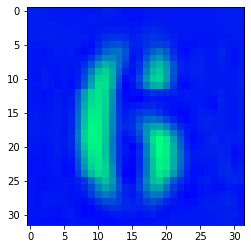

In [50]:
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter Notebook
%matplotlib inline
print("Label:{}".format(y_train[1000]))
plt.imshow(X_train[1000],cmap='winter_r')

Label:7


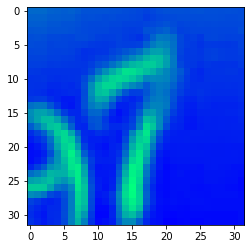

In [51]:
print("Label:{}".format(y_train[2000]))
plt.imshow(X_train[2000],cmap='winter_r')

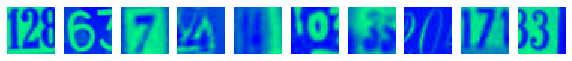

Labels for each of the above image is: [2 6 7 4 4 0 3 0 7 3]


In [52]:
# Visualizing the first 10 images with their labels
plt.figure(figsize=(10,1))
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i],cmap='winter_r')
    plt.axis('off')
plt.show()
print("Labels for each of the above image is:",y_train[0:10])

# Implementing the Deep Neural Network

Reshape features
* reshape() method gives a new shape to an array without changing its data

In [53]:
# Reshape the data from 2D to 1D---->32x32 to 1024
X_train=np.asarray(X_train).reshape(42000,1024)
X_test=np.asarray(X_test).reshape(18000,1024)
X_val=np.asarray(X_val).reshape(60000,1024)

Normalize features
* Normalize the features from 0-255 to 0-1

In [54]:
print(X_train.max())
print(X_train.min())

254.9745
0.0


In [55]:
print("After Normalizing the features:----")

X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

print(X_train.max())
print(X_train.min())

After Normalizing the features:----
0.9999
0.0


One-hot encode the class vector
* convert this class vectors to binary class matrix
* convert X_train,X_test and X_val
* number of classes=10

In [56]:
import tensorflow

In [57]:
print(y_train[0])
y_train=tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tensorflow.keras.utils.to_categorical(y_test,num_classes=10)
y_val=tensorflow.keras.utils.to_categorical(y_val,num_classes=10)

2


In [58]:
print("After One-hot encoding:---")
print(y_train[0])

After One-hot encoding:---
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


# Implementing Neural Network

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers,optimizers

# Initilize the Neural Network Classifier
model=Sequential()

In [76]:
# Input Layer
# Adding Input Layer and activation function ReLu
model.add(Dense(512,input_shape=(1024,),activation='relu'))

In [77]:
# Hidden Layer
# Adding hidden layer and activation function ReLu
model.add(Dense(512,activation='relu'))

In [78]:
# Output Layer
# Adding output layer which is of 10 nodes and activation function softmax,because we have multiclass classification
model.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(0)))

# Using sgd optimizer and Categorical crossentropy as loss function and accuracy as a metric to monitor

In [79]:
# compiling the NN Classifier
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [80]:
# Fitting the NN to the Training data
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=10,verbose=1)

Epoch 1/10
210/210 [==============================] - 2s 9ms/step - loss: 2.2931 - accuracy: 0.1318 - val_loss: 2.2777 - val_accuracy: 0.1681
Epoch 2/10
210/210 [==============================] - 2s 9ms/step - loss: 2.2710 - accuracy: 0.1700 - val_loss: 2.2623 - val_accuracy: 0.1578
Epoch 3/10
210/210 [==============================] - 2s 9ms/step - loss: 2.2522 - accuracy: 0.2120 - val_loss: 2.2400 - val_accuracy: 0.2300
Epoch 4/10
210/210 [==============================] - 2s 10ms/step - loss: 2.2286 - accuracy: 0.2503 - val_loss: 2.2140 - val_accuracy: 0.2925
Epoch 5/10
210/210 [==============================] - 2s 9ms/step - loss: 2.2007 - accuracy: 0.2945 - val_loss: 2.1813 - val_accuracy: 0.3397
Epoch 6/10
210/210 [==============================] - 2s 9ms/step - loss: 2.1647 - accuracy: 0.3345 - val_loss: 2.1427 - val_accuracy: 0.3670
Epoch 7/10
210/210 [==============================] - 2s 9ms/step - loss: 2.1213 - accuracy: 0.3701 - val_loss: 2.0951 - val_accuracy: 0.3821
Epoch

# Using adam optimizer and Categorical crossentropy as loss function and accuracy as a metric to monitor

In [81]:
# compiling the NN Classifier
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [82]:
# Fitting the NN to the Training data
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=10,verbose=1)

Epoch 1/10
210/210 [==============================] - 2s 10ms/step - loss: 1.7234 - accuracy: 0.4348 - val_loss: 1.3520 - val_accuracy: 0.5732
Epoch 2/10
210/210 [==============================] - 2s 9ms/step - loss: 1.2314 - accuracy: 0.6137 - val_loss: 1.1157 - val_accuracy: 0.6514
Epoch 3/10
210/210 [==============================] - 2s 9ms/step - loss: 1.0698 - accuracy: 0.6685 - val_loss: 1.0135 - val_accuracy: 0.6886
Epoch 4/10
210/210 [==============================] - 2s 9ms/step - loss: 0.9674 - accuracy: 0.7007 - val_loss: 0.9668 - val_accuracy: 0.6975
Epoch 5/10
210/210 [==============================] - 2s 9ms/step - loss: 0.8998 - accuracy: 0.7243 - val_loss: 0.8261 - val_accuracy: 0.7530
Epoch 6/10
210/210 [==============================] - 2s 9ms/step - loss: 0.8469 - accuracy: 0.7402 - val_loss: 0.7906 - val_accuracy: 0.7595
Epoch 7/10
210/210 [==============================] - 2s 9ms/step - loss: 0.7986 - accuracy: 0.7560 - val_loss: 0.7811 - val_accuracy: 0.7637
Epoch

# Quick Insight

The accuracy of the model on validation data is very low either using sgd or adam.Now,we will try to change the learning rate of both sgd and adam optimizers and will compare the accuracy.As,we are taking learning rate small means model will learn slowly.So,we  have to take more number of epochs

In [83]:
# Setting the learning rate and momentum in sgd
sgd=optimizers.SGD(lr=0.0001,momentum=0.9)

In [84]:
# compiling the NN Classifier
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [85]:
# Fitting the NN to the Training data
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6255 - accuracy: 0.8124 - val_loss: 0.6319 - val_accuracy: 0.8127
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6031 - accuracy: 0.8216 - val_loss: 0.6239 - val_accuracy: 0.8164
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5971 - accuracy: 0.8230 - val_loss: 0.6200 - val_accuracy: 0.8174
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5935 - accuracy: 0.8245 - val_loss: 0.6170 - val_accuracy: 0.8183
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5909 - accuracy: 0.8250 - val_loss: 0.6156 - val_accuracy: 0.8188
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5892 - accuracy: 0.8255 - val_loss: 0.6137 - val_accuracy: 0.8195
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5877 - accuracy: 0.8261 - val_loss: 0.6130 - val_accuracy: 0.8197

Epoch 58/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5668 - accuracy: 0.8334 - val_loss: 0.5946 - val_accuracy: 0.8260
Epoch 59/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5666 - accuracy: 0.8329 - val_loss: 0.5948 - val_accuracy: 0.8264
Epoch 60/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5662 - accuracy: 0.8332 - val_loss: 0.5941 - val_accuracy: 0.8265
Epoch 61/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5660 - accuracy: 0.8331 - val_loss: 0.5940 - val_accuracy: 0.8265
Epoch 62/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5658 - accuracy: 0.8335 - val_loss: 0.5937 - val_accuracy: 0.8261
Epoch 63/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5655 - accuracy: 0.8339 - val_loss: 0.5935 - val_accuracy: 0.8268
Epoch 64/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5653 - accuracy: 0.8340 - val_loss: 0.5933 - val_accuracy:

# Comments

The accuracy of the model on validation data using sgd with learning rate=0.0001 has shown significant improvement

In [86]:
# Setting the learning rate in adam
adam=optimizers.Adam(lr=0.0001)

In [87]:
# compiling the NN Classifier
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [88]:
# Fitting the NN to the Training data
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5717 - accuracy: 0.8301 - val_loss: 0.5925 - val_accuracy: 0.8252
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5649 - accuracy: 0.8337 - val_loss: 0.5837 - val_accuracy: 0.8289
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5602 - accuracy: 0.8341 - val_loss: 0.5821 - val_accuracy: 0.8291
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5546 - accuracy: 0.8360 - val_loss: 0.5788 - val_accuracy: 0.8312
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5504 - accuracy: 0.8382 - val_loss: 0.5768 - val_accuracy: 0.8327
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5468 - accuracy: 0.8378 - val_loss: 0.5741 - val_accuracy: 0.8323
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 0.5429 - accuracy: 0.8391 - val_loss: 0.5675 - val_accuracy: 0.8330

Epoch 58/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3825 - accuracy: 0.8888 - val_loss: 0.4335 - val_accuracy: 0.8757
Epoch 59/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3805 - accuracy: 0.8890 - val_loss: 0.4306 - val_accuracy: 0.8767
Epoch 60/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3782 - accuracy: 0.8900 - val_loss: 0.4303 - val_accuracy: 0.8769
Epoch 61/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3760 - accuracy: 0.8898 - val_loss: 0.4231 - val_accuracy: 0.8799
Epoch 62/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3736 - accuracy: 0.8910 - val_loss: 0.4254 - val_accuracy: 0.8793
Epoch 63/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3711 - accuracy: 0.8918 - val_loss: 0.4215 - val_accuracy: 0.8791
Epoch 64/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3703 - accuracy: 0.8925 - val_loss: 0.4207 - val_accuracy:

# Comments

The accuracy of the model on validation data using adam with learning rate=0.0001 has shown significant improvement

# Implementing the Batch Normalization for training the Neural Network

In [89]:
from tensorflow.keras.layers import BatchNormalization

# Initilize the Neural Network Classifier
model1=Sequential()

In [90]:
# Input Layer
# Adding Input Layer and activation function ReLu
model1.add(Dense(512,input_shape=(1024,),activation='relu'))

#Adding BatchNormalization Layer
model1.add(BatchNormalization())

In [91]:
# Hidden Layer
# Adding hidden layer and activation function ReLu
model1.add(Dense(512,activation='relu'))

#Adding BatchNormalization Layer
model1.add(BatchNormalization())

In [92]:
# Output Layer
# Adding output layer which is of 10 nodes and activation function softmax,because we have multiclass classification
model1.add(Dense(10,activation='softmax'))

In [93]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 796,682
Trainable params: 794,634
Non-trainable params: 2,048
_________________________________________________________________


# Using SGD optimizer with learning rate=0.0001 and momentum=0.9

In [94]:
sgd=optimizers.SGD(learning_rate=0.0001,momentum=0.9)
model1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 3s 12ms/step - loss: 2.5048 - accuracy: 0.1626 - val_loss: 2.2777 - val_accuracy: 0.1550
Epoch 2/100
210/210 [==============================] - 2s 12ms/step - loss: 2.0990 - accuracy: 0.2865 - val_loss: 2.0489 - val_accuracy: 0.2860
Epoch 3/100
210/210 [==============================] - 3s 12ms/step - loss: 1.8858 - accuracy: 0.3712 - val_loss: 1.8117 - val_accuracy: 0.4047
Epoch 4/100
210/210 [==============================] - 3s 12ms/step - loss: 1.7329 - accuracy: 0.4362 - val_loss: 1.6693 - val_accuracy: 0.4675
Epoch 5/100
210/210 [==============================] - 3s 12ms/step - loss: 1.6151 - accuracy: 0.4863 - val_loss: 1.5591 - val_accuracy: 0.5103
Epoch 6/100
210/210 [==============================] - 2s 11ms/step - loss: 1.5188 - accuracy: 0.5262 - val_loss: 1.4746 - val_accuracy: 0.5466
Epoch 7/100
210/210 [==============================] - 2s 11ms/step - loss: 1.4406 - accuracy: 0.5547 - val_loss: 1.4007 - val_accuracy:

210/210 [==============================] - 2s 11ms/step - loss: 0.6514 - accuracy: 0.8132 - val_loss: 0.6684 - val_accuracy: 0.8098
Epoch 58/100
210/210 [==============================] - 2s 12ms/step - loss: 0.6458 - accuracy: 0.8142 - val_loss: 0.6686 - val_accuracy: 0.8088
Epoch 59/100
210/210 [==============================] - 3s 12ms/step - loss: 0.6418 - accuracy: 0.8174 - val_loss: 0.6607 - val_accuracy: 0.8122
Epoch 60/100
210/210 [==============================] - 2s 12ms/step - loss: 0.6375 - accuracy: 0.8169 - val_loss: 0.6557 - val_accuracy: 0.8130
Epoch 61/100
210/210 [==============================] - 2s 12ms/step - loss: 0.6341 - accuracy: 0.8179 - val_loss: 0.6626 - val_accuracy: 0.8102
Epoch 62/100
210/210 [==============================] - 2s 12ms/step - loss: 0.6288 - accuracy: 0.8198 - val_loss: 0.6490 - val_accuracy: 0.8141
Epoch 63/100
210/210 [==============================] - 2s 11ms/step - loss: 0.6238 - accuracy: 0.8191 - val_loss: 0.6465 - val_accuracy: 0.816

# Using Adam optimizer with learning rate=0.0001

In [95]:
adam=optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 3s 13ms/step - loss: 0.5774 - accuracy: 0.8300 - val_loss: 0.7341 - val_accuracy: 0.7741
Epoch 2/100
210/210 [==============================] - 2s 12ms/step - loss: 0.5423 - accuracy: 0.8378 - val_loss: 0.7047 - val_accuracy: 0.7871
Epoch 3/100
210/210 [==============================] - 3s 12ms/step - loss: 0.5179 - accuracy: 0.8469 - val_loss: 0.7166 - val_accuracy: 0.7843
Epoch 4/100
210/210 [==============================] - 2s 12ms/step - loss: 0.4930 - accuracy: 0.8530 - val_loss: 0.6171 - val_accuracy: 0.8098
Epoch 5/100
210/210 [==============================] - 3s 12ms/step - loss: 0.4737 - accuracy: 0.8592 - val_loss: 0.7604 - val_accuracy: 0.7668
Epoch 6/100
210/210 [==============================] - 3s 12ms/step - loss: 0.4530 - accuracy: 0.8666 - val_loss: 0.6804 - val_accuracy: 0.7894
Epoch 7/100
210/210 [==============================] - 3s 12ms/step - loss: 0.4271 - accuracy: 0.8766 - val_loss: 0.6918 - val_accuracy:

210/210 [==============================] - 2s 12ms/step - loss: 0.1163 - accuracy: 0.9683 - val_loss: 0.4933 - val_accuracy: 0.8657
Epoch 58/100
210/210 [==============================] - 2s 12ms/step - loss: 0.1094 - accuracy: 0.9710 - val_loss: 0.5142 - val_accuracy: 0.8575
Epoch 59/100
210/210 [==============================] - 2s 12ms/step - loss: 0.1081 - accuracy: 0.9704 - val_loss: 0.4780 - val_accuracy: 0.8684
Epoch 60/100
210/210 [==============================] - 2s 12ms/step - loss: 0.1100 - accuracy: 0.9690 - val_loss: 0.5246 - val_accuracy: 0.8540
Epoch 61/100
210/210 [==============================] - 3s 12ms/step - loss: 0.1106 - accuracy: 0.9689 - val_loss: 0.3685 - val_accuracy: 0.8969
Epoch 62/100
210/210 [==============================] - 2s 12ms/step - loss: 0.1061 - accuracy: 0.9708 - val_loss: 0.4795 - val_accuracy: 0.8746
Epoch 63/100
210/210 [==============================] - 3s 12ms/step - loss: 0.1062 - accuracy: 0.9707 - val_loss: 0.4628 - val_accuracy: 0.873

# Quick Insight

The batch normalization using adam optimizer is giving better results than using SGD optimizer

# Implementing Batch Normalization and Drop out for training the neural network

In [96]:
from tensorflow.keras.layers import Dropout

# Initilize the Neural Network Classifier
model2=Sequential()

# Input Layer
# Adding Input Layer and activation function ReLu
model2.add(Dense(512,input_shape=(1024,),activation='relu'))

#Adding BatchNormalization Layer
model2.add(BatchNormalization())

#Adding Dropout Layer
model2.add(Dropout(0.5))

# Hidden Layer
# Adding Input Layer and activation function ReLu
model2.add(Dense(512,activation='relu'))

#Adding BatchNormalization Layer
model2.add(BatchNormalization())

#Adding Dropout Layer
model2.add(Dropout(0.5))

# Output Layer
# Adding output layer which is of 10 nodes and activation function softmax,because we have multiclass classification
model2.add(Dense(10,activation='softmax'))

In [97]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)               

# Using SGD optimizer with learning rate=0.0001 and momentum=0.9

In [98]:
sgd=optimizers.SGD(learning_rate=0.0001,momentum=0.9)
model2.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 3s 13ms/step - loss: 3.4514 - accuracy: 0.1124 - val_loss: 2.3218 - val_accuracy: 0.1249
Epoch 2/100
210/210 [==============================] - 3s 12ms/step - loss: 3.2028 - accuracy: 0.1253 - val_loss: 2.2250 - val_accuracy: 0.1894
Epoch 3/100
210/210 [==============================] - 3s 12ms/step - loss: 3.0678 - accuracy: 0.1429 - val_loss: 2.0853 - val_accuracy: 0.2756
Epoch 4/100
210/210 [==============================] - 2s 12ms/step - loss: 2.9358 - accuracy: 0.1558 - val_loss: 1.9855 - val_accuracy: 0.3296
Epoch 5/100
210/210 [==============================] - 3s 13ms/step - loss: 2.8222 - accuracy: 0.1727 - val_loss: 1.9053 - val_accuracy: 0.3589
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 2.7149 - accuracy: 0.1873 - val_loss: 1.8308 - val_accuracy: 0.4076
Epoch 7/100
210/210 [==============================] - 2s 12ms/step - loss: 2.6106 - accuracy: 0.2034 - val_loss: 1.7593 - val_accuracy:

210/210 [==============================] - 3s 12ms/step - loss: 1.2902 - accuracy: 0.5812 - val_loss: 0.9470 - val_accuracy: 0.7275
Epoch 58/100
210/210 [==============================] - 3s 12ms/step - loss: 1.2748 - accuracy: 0.5877 - val_loss: 0.9446 - val_accuracy: 0.7286
Epoch 59/100
210/210 [==============================] - 2s 12ms/step - loss: 1.2739 - accuracy: 0.5878 - val_loss: 0.9428 - val_accuracy: 0.7269
Epoch 60/100
210/210 [==============================] - 3s 12ms/step - loss: 1.2659 - accuracy: 0.5906 - val_loss: 0.9307 - val_accuracy: 0.7327
Epoch 61/100
210/210 [==============================] - 3s 12ms/step - loss: 1.2623 - accuracy: 0.5925 - val_loss: 0.9299 - val_accuracy: 0.7331
Epoch 62/100
210/210 [==============================] - 3s 12ms/step - loss: 1.2508 - accuracy: 0.5944 - val_loss: 0.9212 - val_accuracy: 0.7355
Epoch 63/100
210/210 [==============================] - 3s 12ms/step - loss: 1.2482 - accuracy: 0.5980 - val_loss: 0.9221 - val_accuracy: 0.734

# Using Adam optimizer with learning rate=0.0001

In [99]:
adam=optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 3s 13ms/step - loss: 1.1499 - accuracy: 0.6327 - val_loss: 0.8851 - val_accuracy: 0.7403
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 1.1279 - accuracy: 0.6396 - val_loss: 0.8630 - val_accuracy: 0.7470
Epoch 3/100
210/210 [==============================] - 3s 13ms/step - loss: 1.1016 - accuracy: 0.6528 - val_loss: 0.8869 - val_accuracy: 0.7249
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 1.0824 - accuracy: 0.6580 - val_loss: 0.8641 - val_accuracy: 0.7360
Epoch 5/100
210/210 [==============================] - 3s 13ms/step - loss: 1.0727 - accuracy: 0.6627 - val_loss: 0.8233 - val_accuracy: 0.7510
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 1.0409 - accuracy: 0.6732 - val_loss: 0.8095 - val_accuracy: 0.7606
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 1.0272 - accuracy: 0.6762 - val_loss: 0.7863 - val_accuracy:

210/210 [==============================] - 3s 12ms/step - loss: 0.7324 - accuracy: 0.7722 - val_loss: 0.5465 - val_accuracy: 0.8381
Epoch 58/100
210/210 [==============================] - 3s 12ms/step - loss: 0.7296 - accuracy: 0.7728 - val_loss: 0.5638 - val_accuracy: 0.8272
Epoch 59/100
210/210 [==============================] - 3s 12ms/step - loss: 0.7329 - accuracy: 0.7741 - val_loss: 0.5521 - val_accuracy: 0.8373
Epoch 60/100
210/210 [==============================] - 3s 12ms/step - loss: 0.7325 - accuracy: 0.7718 - val_loss: 0.5315 - val_accuracy: 0.8390
Epoch 61/100
210/210 [==============================] - 3s 12ms/step - loss: 0.7197 - accuracy: 0.7777 - val_loss: 0.5278 - val_accuracy: 0.8414
Epoch 62/100
210/210 [==============================] - 3s 12ms/step - loss: 0.7238 - accuracy: 0.7755 - val_loss: 0.5623 - val_accuracy: 0.8275
Epoch 63/100
210/210 [==============================] - 3s 12ms/step - loss: 0.7213 - accuracy: 0.7765 - val_loss: 0.5370 - val_accuracy: 0.835

# Quick Insight

The accuracy of the model on validation data using Drop out layer is very low either using sgd or adam.we will try to train the Neural network using Batch Normalization only.The batch normalization using adam optimizer is giving better results than using SGD optimizer.So,we will use adam optimizer to test the Neural network on test data and we will predict the images

# Testing NN on test data

In [100]:
# Initilize the Neural Network Classifier
model_final=Sequential()

In [101]:
# Input Layer
# Adding Input Layer and activation function ReLu
model_final.add(Dense(512,input_shape=(1024,),activation='relu'))

#Adding BatchNormalization Layer
model_final.add(BatchNormalization())

In [102]:
# Hidden Layer
# Adding Input Layer and activation function ReLu
model_final.add(Dense(512,activation='relu'))

#Adding BatchNormalization Layer
model_final.add(BatchNormalization())

In [103]:
# Output Layer
# Adding output layer which is of 10 nodes and activation function softmax,because we have multiclass classification
model_final.add(Dense(10,activation='softmax'))

# Using Adam optimizer with leaning rate=0.0001

In [104]:
adam=optimizers.Adam(learning_rate=0.0001)
model_final.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model_final.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=200,epochs=100,verbose=1)

Epoch 1/100
210/210 [==============================] - 2s 10ms/step - loss: 1.6886 - accuracy: 0.4570 - val_loss: 1.8577 - val_accuracy: 0.3894
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 1.0623 - accuracy: 0.6842 - val_loss: 1.2076 - val_accuracy: 0.6271
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 0.8802 - accuracy: 0.7425 - val_loss: 1.0266 - val_accuracy: 0.6817
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 0.7714 - accuracy: 0.7759 - val_loss: 0.9415 - val_accuracy: 0.7142
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6967 - accuracy: 0.7995 - val_loss: 0.8784 - val_accuracy: 0.7323
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6420 - accuracy: 0.8152 - val_loss: 0.9812 - val_accuracy: 0.6841
Epoch 7/100
210/210 [==============================] - 2s 10ms/step - loss: 0.5982 - accuracy: 0.8276 - val_loss: 0.8480 - val_accuracy:

Epoch 58/100
210/210 [==============================] - 2s 9ms/step - loss: 0.1189 - accuracy: 0.9683 - val_loss: 1.1221 - val_accuracy: 0.7472
Epoch 59/100
210/210 [==============================] - 2s 10ms/step - loss: 0.1126 - accuracy: 0.9698 - val_loss: 0.9202 - val_accuracy: 0.7811
Epoch 60/100
210/210 [==============================] - 2s 10ms/step - loss: 0.1125 - accuracy: 0.9695 - val_loss: 0.9139 - val_accuracy: 0.7850
Epoch 61/100
210/210 [==============================] - 2s 10ms/step - loss: 0.1120 - accuracy: 0.9698 - val_loss: 0.8096 - val_accuracy: 0.7994
Epoch 62/100
210/210 [==============================] - 2s 10ms/step - loss: 0.1068 - accuracy: 0.9712 - val_loss: 0.7738 - val_accuracy: 0.8103
Epoch 63/100
210/210 [==============================] - 2s 9ms/step - loss: 0.1108 - accuracy: 0.9697 - val_loss: 0.7757 - val_accuracy: 0.8126
Epoch 64/100
210/210 [==============================] - 2s 9ms/step - loss: 0.1025 - accuracy: 0.9727 - val_loss: 0.9039 - val_accur

In [105]:
result_final=model_final.evaluate(X_test,y_test)
print("Test Accuracy on Testing data:",result_final[1])

563/563 [==============================] - 1s 1ms/step - loss: 0.8268 - accuracy: 0.8208: 0s - loss: 0.7990 - ac
Test Accuracy on Testing data: 0.8208333253860474


# Predicting the Digits using NN

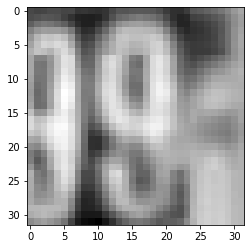

In [108]:
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [109]:
model_final.predict_classes(X_test)[112]

9

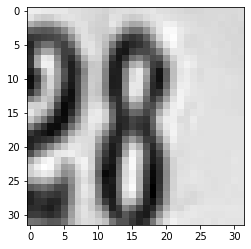

In [115]:
plt.imshow(X_test[55].reshape(32,32),cmap='gray')

In [116]:
model_final.predict_classes(X_test)[55]

8

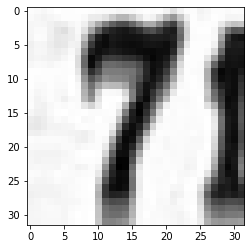

In [119]:
plt.imshow(X_test[265].reshape(32,32),cmap='gray')

In [120]:
model_final.predict_classes(X_test)[265]

7

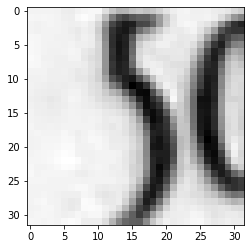

In [124]:
plt.imshow(X_test[272].reshape(32,32),cmap='gray')

In [126]:
model_final.predict_classes(X_test)[272]

5

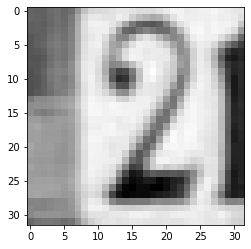

In [129]:
plt.imshow(X_test[745].reshape(32,32),cmap='gray')

In [130]:
model_final.predict_classes(X_test)[745]

2

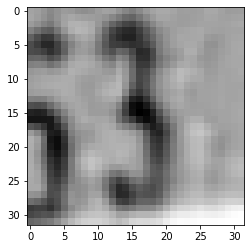

In [132]:
plt.imshow(X_test[121].reshape(32,32),cmap='gray')

In [133]:
model_final.predict_classes(X_test)[121]

3

# Summary

Using NN with batchNormalization we got 82% accuracy. We have predicted the classification of the images correctly